In [1]:
import sncosmo

In [2]:
lc = sncosmo.read_lc('/Users/rbiswas/data/JLA_Calibration_OnlineData/cosmology/jla_light_curves/lc-SDSS14331.list',
                    format='salt2')

In [4]:
meta = lc.meta

In [5]:
from analyzeSN import LightCurve

In [6]:
lcp = lc.to_pandas()
lcp['Filter'] = lcp['Filter'].apply(lambda x: 'sdss' + x[-1])
lcp['MagSys'] = 'ab'

In [7]:
lco  = LightCurve(lcp)

In [8]:
lco.lightCurve.head()

,mjd,flux,fluxerr,zp,band,zpsys
0,53974.332,-3.67,12.337,27.5,sdssg,ab
1,53974.332,-3.77,18.608,27.5,sdssr,ab
2,53974.332,-13.39,29.725,27.5,sdssi,ab
3,53974.332,5.99,91.963,27.5,sdssz,ab
4,53974.332,6.97,37.978,27.5,sdssu,ab


In [9]:
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='salt2', effects=[dust], effect_names=['mw'], effect_frames=['obs'])
model.set(mwebv=meta['MWEBV'])
model.set(z=0.21)

In [10]:
fitres = sncosmo.fit_lc(lco.snCosmoLC(), model=model, vparam_names=['x0', 'x1', 'c', 't0'], modelcov=True)

/Users/rbiswas/soft/LSST_el_capitan/DarwinX86/sncosmo/12.0-1-g5e70e90+1/lib/python/sncosmo-1.3.0-py2.7-macosx-10.6-x86_64.egg/sncosmo/fitting.py:132: RuntimeWarning: Dropping following bands from data: 'sdssz'(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)


In [11]:
from analyzeSN import ResChar

In [12]:
ResChar.fromSNCosmoRes(fitres).parameters

z            0.210000
t0       54013.463228
x0           0.000058
x1           0.145790
c            0.026653
mwebv        0.022100
mwr_v        3.100000
dtype: float64

In [13]:
fig = sncosmo.plot_lc(lco.snCosmoLC(), model=fitres[1])

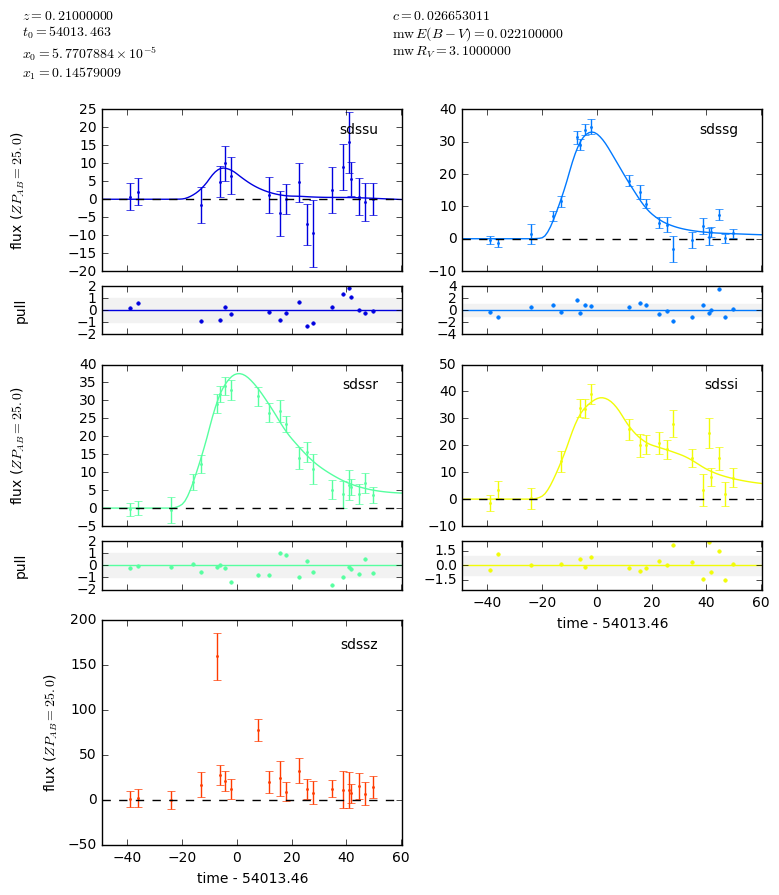

In [14]:
fig

## Setting model parameters from JLA_paramslc.txt by hand

In [15]:
model.set(x1=0.141351)
model.set(z=0.213)
model.set(c=0.0142)

In [16]:
print model

source:
  class      : SALT2Source
  name       : 'salt2'
  version    : 2.4
  phases     : [-20, .., 50] days
  wavelengths: [2000, .., 9200] Angstroms
effect (name='mw' frame='obs'):
  class           : CCM89Dust
  wavelength range: [1000, 33333.3] Angstroms
parameters:
  z     = 0.21299999999999999
  t0    = 0.0
  x0    = 1.0
  x1    = 0.141351
  c     = 0.014200000000000001
  mwebv = 0.022100000000000002
  mwr_v = 3.1000000000000001


In [17]:
fitres_JLAparams = sncosmo.fit_lc(lco.snCosmoLC(), model=model, vparam_names=['x0', 't0'], modelcov=True)

In [18]:
fitres_JLAparams[0].parameters

array([  2.13000000e-01,   5.40134826e+04,   5.79386850e-05,
         1.41351000e-01,   1.42000000e-02,   2.21000000e-02,
         3.10000000e+00])

In [21]:
fig = sncosmo.plot_lc(lco.snCosmoLC(), model=(fitres[1], fitres_JLAparams[1]))

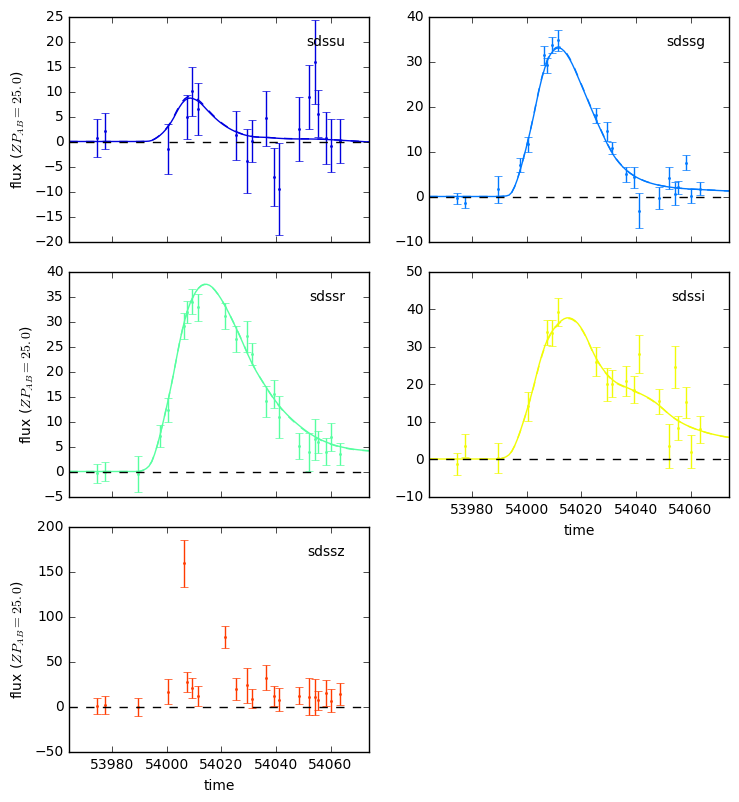

In [22]:
fig

In [23]:
mcmcres_JLAparams = sncosmo.mcmc_lc(lco.snCosmoLC(), model=model, vparam_names=['x0', 't0'], modelcov=True)

In [34]:
ResChar.fromSNCosmoRes(mcmcres_JLAparams).parameters

z            0.213000
t0       54013.463430
x0           0.000058
x1           0.141351
c            0.014200
mwebv        0.022100
mwr_v        3.100000
dtype: float64

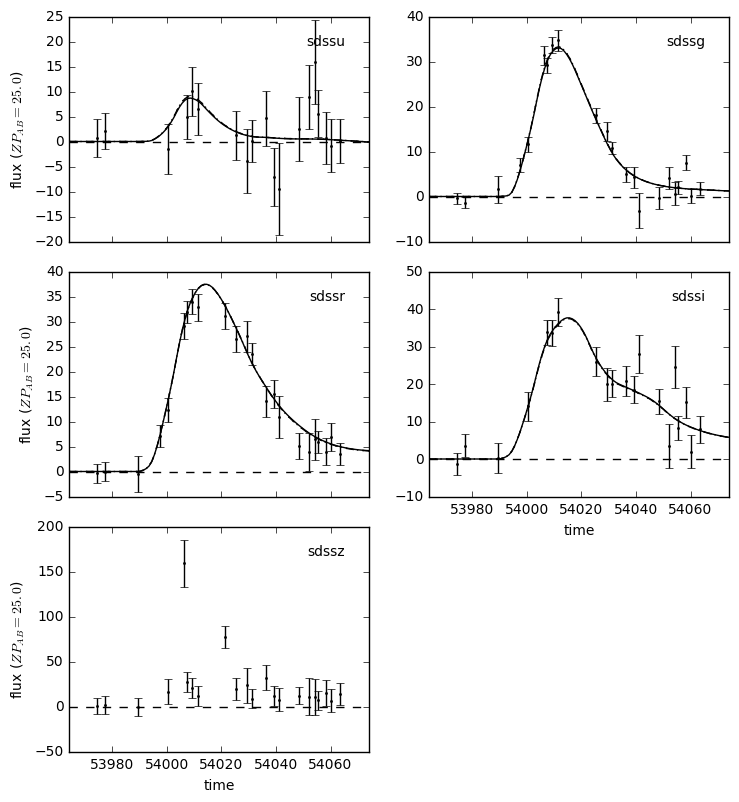

In [32]:
sncosmo.plot_lc(lco.snCosmoLC(), model=[fitres[1], fitres_JLAparams[1], mcmcres_JLAparams[1]], color='k')